# Ecommerce Churn Prediction | Data Mining

> ### Objective of Project:
> Building a Churn Prediction Model for Ecommerce Company: A Comparative Study of Classification Algorithms and Deep Learning Architectures

# Importing Libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

from imblearn.combine import SMOTETomek

#Pre-Processing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, balanced_accuracy_score
from sklearn.metrics import classification_report


# Required Libraries

In [3]:
!pip install feature_engine
!pip install openpyxl
!pip install statsmodels
!pip install -U imbalanced-learn
!pip install shap lime

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.
tensorflow-intel 2.16.1 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 1.22.4 which is incompatible.


  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 344.3/344.3 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 11.6/11.6 MB 663.7 kB/s eta 0:00:00
   ---------------------------------------- 10.6/10.6 MB 554.7 kB/s eta 0:00:00
Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
   -------------------------------------- 345.4/345.4 kB 794.1 kB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable
  Using cached lime-0.2.0.1.tar.gz (275 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of pandas to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of pandas to determine which version is compatible with other requirements. This could take a while.
   -------------------------------------- 455.5/455.5 kB 548.3 kB/s eta 0:00:00
   ---------------------------------------- 14.0/14.0 MB 510.6 kB/s eta 0:00:00
   ---------------------------------------- 10.8/10.8 MB 516.4 kB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283842 sha256=18ab31a393d02abc63d605721e8530253ba98e64b3c159d43e1578329f043afe
  Stored in directory: c:\users\hamza\appdata\local\pip\cache\wheels\ed\d7\c9\5a0130d06d6310bc6

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
feature-engine 1.7.0 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
tensorflow-intel 2.16.1 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 1.21.6 which is incompatible.



Successfully built lime
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2


# Importing Dataset

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Ecommerce_data = pd.read_excel("E Commerce Dataset.xlsx",sheet_name="E Comm")
Ecommerce_data.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [5]:
Ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## Dataset Manipulation

In [6]:
#printing null values in each column
Ecommerce_data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:
print("Before Dropping Missing values:", Ecommerce_data.isna().sum().sum())
Ecommerce_data.dropna(inplace=True)
print("After Dropping missing values: ",Ecommerce_data.isna().sum().sum())

Before Dropping Missing values: 1856
After Dropping missing values:  0


In [8]:
catagorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']
numerical_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered','SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear','CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

In [9]:
y = Ecommerce_data['Churn']
X = Ecommerce_data.drop(['Churn','CustomerID'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

## Encoding catagorical columns

In [10]:
from sklearn.preprocessing import OrdinalEncoder
def encoder_function(encoder, X_train, X_test):
    encoder.fit(X_train)
    return encoder.transform(X_train), encoder.transform(X_test)

## LabelEncoder

In [11]:

Encoded_data = Ecommerce_data[catagorical_columns]

label_Encoder = LabelEncoder()
Encoded_data = Encoded_data.apply(lambda x: label_Encoder.fit_transform(x))
Encoded_data = pd.concat([Encoded_data,Ecommerce_data[numerical_columns]],axis=1)
# Encoded_data = pd.get_dummies(Encoded_data)
Encoded_data.head()

PreferredLoginDevice  PreferredPaymentMode  PreferedOrderCat  \
0                      1                     4                 2   
3                      2                     4                 2   
5                      0                     4                 4   
11                     1                     4                 0   
12                     2                     1                 3   

    MaritalStatus  Tenure  WarehouseToHome  HourSpendOnApp  \
0               2     4.0              6.0             3.0   
3               2     0.0             15.0             2.0   
5               2     0.0             22.0             3.0   
11              2    11.0              6.0             3.0   
12              2     0.0             11.0             2.0   

    NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
0                          3                  2                9   
3                          4                  5                8   
5                          5                  5                2   
11                         4                  3               10   
12                         3                  3                2   

    OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                          11.0         1.0         1.0                5.0   
3                          23.0         0.0         1.0                3.0   
5                          22.0         4.0         6.0                7.0   
11                         13.0         0.0         1.0                0.0   
12                         13.0         2.0         2.0                2.0   

    CashbackAmount  
0           159.93  
3           134.07  
5           139.19  
11          153.81  
12          134.41

## Multicollinearity check

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = numerical_columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(Encoded_data[numerical_columns].values, i) for i in range(len(numerical_columns))] 
  
print(vif_data)

                        feature        VIF
0                        Tenure   2.571890
1               WarehouseToHome   4.249706
2                HourSpendOnApp  19.731450
3      NumberOfDeviceRegistered  15.546245
4             SatisfactionScore   5.580603
5               NumberOfAddress   4.112485
6   OrderAmountHikeFromlastYear  16.612475
7                    CouponUsed   4.541017
8                    OrderCount   5.749307
9             DaySinceLastOrder   3.761779
10               CashbackAmount  32.341320


    Features [HourSpendOnApp, NumberOfDeviceRegistered, OrderAmountHikeFromlastYear, and CashbackAmount] have multicollinearity

## Encoded data feature types

In [13]:
Encoded_data.dtypes

PreferredLoginDevice             int32
PreferredPaymentMode             int32
PreferedOrderCat                 int32
MaritalStatus                    int32
Tenure                         float64
WarehouseToHome                float64
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
SatisfactionScore                int64
NumberOfAddress                  int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

# Outlier Detection (BOX PLOT)

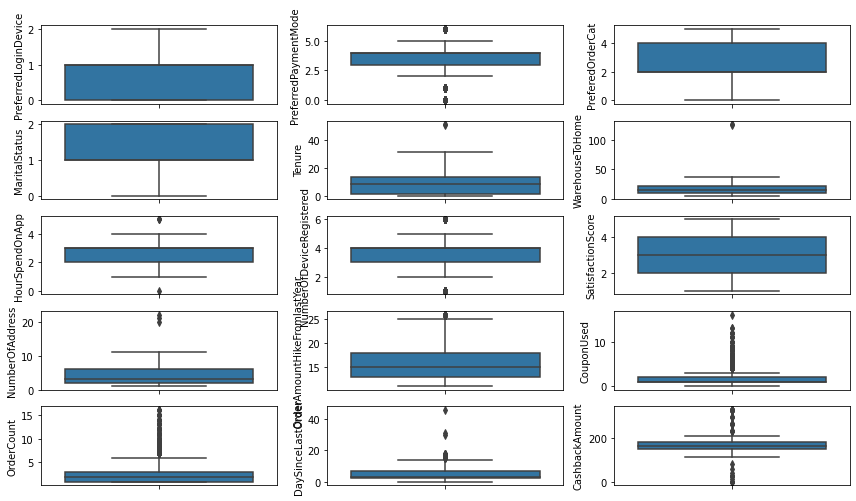

In [14]:
fig = plt.figure(figsize=(12,12))

for attribute in range(len(Encoded_data.columns)):
    fig.add_subplot(9,3,attribute+1)
    sns.boxplot(y=Encoded_data.iloc[:,attribute])

plt.tight_layout()
plt.show()

## handle_outliers

In [15]:
def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

In [16]:
is_outlier = ['Tenure' , 'WarehouseToHome' , 'NumberOfAddress' , 'DaySinceLastOrder' , 'HourSpendOnApp' , 'NumberOfDeviceRegistered']

for col in is_outlier:
    Encoded_data = handle_outliers(Encoded_data , col)

## After removal of outliers

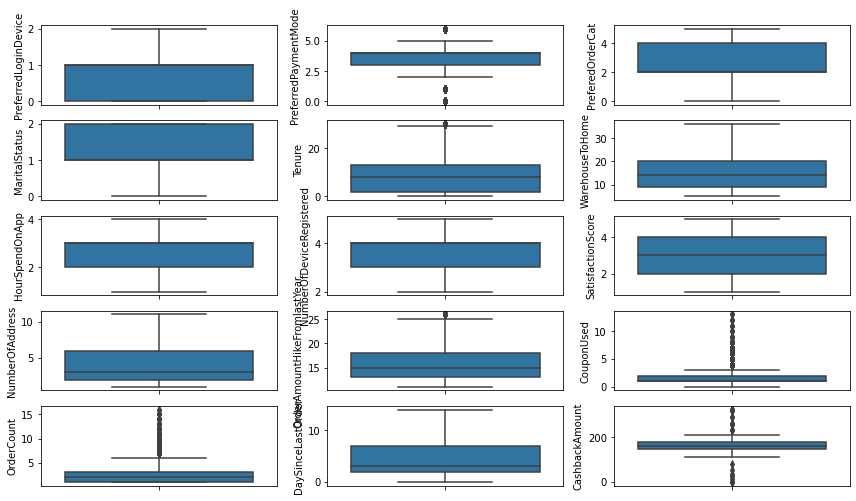

In [17]:
fig = plt.figure(figsize=(12,12))

for attribute in range(len(Encoded_data.columns)):
    fig.add_subplot(9,3,attribute+1)
    sns.boxplot(y=Encoded_data.iloc[:,attribute])

plt.tight_layout()
plt.show()

# Class Imbalance check

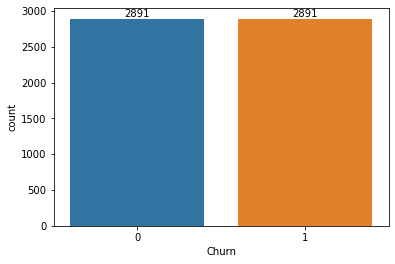

<Figure size 432x288 with 0 Axes>

In [18]:
Encoded_data['Churn']= Ecommerce_data.Churn
y = Encoded_data['Churn']
X = Encoded_data.drop('Churn', axis=1)
# Resampling
resample = SMOTETomek(random_state=42)
X_res, y_res = resample.fit_resample(X, y)

ax = sns.countplot(x=y_res)
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

# Storing in Dataframe

In [19]:
resampled_data = pd.DataFrame(X_res, columns=X.columns)
resampled_data['Churn'] = y_res

# Save the resampled data to a file  CSV
resampled_data.to_csv('resampled_data.csv', index=False)

In [20]:
resampled_data.head()

PreferredLoginDevice  PreferredPaymentMode  PreferedOrderCat  \
0                     1                     4                 2   
1                     2                     4                 2   
2                     0                     4                 4   
3                     1                     4                 0   
4                     2                     1                 3   

   MaritalStatus  Tenure  WarehouseToHome  HourSpendOnApp  \
0              2     4.0              6.0             3.0   
1              2     0.0             15.0             2.0   
2              2     0.0             22.0             3.0   
3              2    11.0              6.0             3.0   
4              2     0.0             11.0             2.0   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
0                         3                  2                9   
1                         4                  5                8   
2                         5                  5                2   
3                         4                  3               10   
4                         3                  3                2   

   OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                         11.0         1.0         1.0                5.0   
1                         23.0         0.0         1.0                3.0   
2                         22.0         4.0         6.0                7.0   
3                         13.0         0.0         1.0                0.0   
4                         13.0         2.0         2.0                2.0   

   CashbackAmount  Churn  
0          159.93      1  
1          134.07      1  
2          139.19      1  
3          153.81      1  
4          134.41      1